<a href="https://colab.research.google.com/github/Pooja-ghode09/basic-recommendation-system-/blob/main/assement4_1basic_recommendation_system_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
file_path = '/content/drive/MyDrive/Netflix Data new.csv'
df = pd.read_csv(file_path)


In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,N_id,Title,Main Genre,Sub Genres,Release Year,Maturity Rating,Original Audio,Recommendations
0,215309,Ace Ventura: Pet Detective,Comedy,"Comedy, Mystery, US",1994.0,A,"Hindi, English [Original]","70184054, 60001650, 70112729, 70027007, 115246..."
1,215318,Ace Ventura: When Nature Calls,Comedy,"Comedy, Action & Adventure, US",1995.0,U/A 16+,"Hindi, English [Original]","70184054, 60001650, 70112729, 70027007, 115246..."
2,217258,The Addams Family,Comedy,"Comedy, US",1991.0,U/A 13+,"English [Original], Hindi, English - Audio Des...","81156676, 81231974, 70027007, 80049939, 702179..."
3,217303,Addams Family Values,Comedy,"Comedy, US",1993.0,U/A 13+,"English [Original], Hindi, English - Audio Des...","81156676, 70044593, 81231974, 70027007, 800500..."
4,235527,Agneepath,Drama,"Hindi-Language, Bollywood, Crime, Drama",1990.0,U/A 16+,Hindi [Original],"17517355, 80158546, 80158395, 80074065, 702042..."


In [ ]:
df[['Title', 'Main Genre', 'Release Year', 'Recommendations' ,'Original Audio']].head()

,Title,Main Genre,Release Year,Recommendations,Original Audio
0,Ace Ventura: Pet Detective,Comedy,1994.0,"70184054, 60001650, 70112729, 70027007, 115246...","Hindi, English [Original]"
1,Ace Ventura: When Nature Calls,Comedy,1995.0,"70184054, 60001650, 70112729, 70027007, 115246...","Hindi, English [Original]"
2,The Addams Family,Comedy,1991.0,"81156676, 81231974, 70027007, 80049939, 702179...","English [Original], Hindi, English - Audio Des..."
3,Addams Family Values,Comedy,1993.0,"81156676, 70044593, 81231974, 70027007, 800500...","English [Original], Hindi, English - Audio Des..."
4,Agneepath,Drama,1990.0,"17517355, 80158546, 80158395, 80074065, 702042...",Hindi [Original]


In [ ]:
df['Recommendations'] = df['Recommendations'].astype(str).apply(lambda x: x.split(','))

In [ ]:
title_to_id = df.set_index('N_id')['Title'].to_dict()
id_to_title = {v: k for k, v in title_to_id.items()}


In [ ]:
def recommend_movies(movie_title):
    movie_row = df[df['Title'] == movie_title]
    if movie_row.empty:
        return ["Movie not found"]

    rec_ids = movie_row.iloc[0]['Recommendations']
    recommended_titles = [title_to_id.get(int(rec_id.strip()), "Unknown") for rec_id in rec_ids]
    return recommended_titles


In [ ]:
recommendations = recommend_movies("Ace Ventura: Pet Detective")
print("Recommended Movies:", recommendations)

Recommended Movies: ['Johnny English Reborn', 'Men in Black', 'Year One', 'The Mask', 'Liar Liar', 'Man Vs Bee', 'Big Daddy', 'Fun with Dick & Jane', 'Evolution', 'Little Man', 'Rush Hour', 'Ace Ventura: When Nature Calls']


In [ ]:
genre_counts = df['Main Genre'].value_counts()

<Axes: xlabel='Main Genre'>

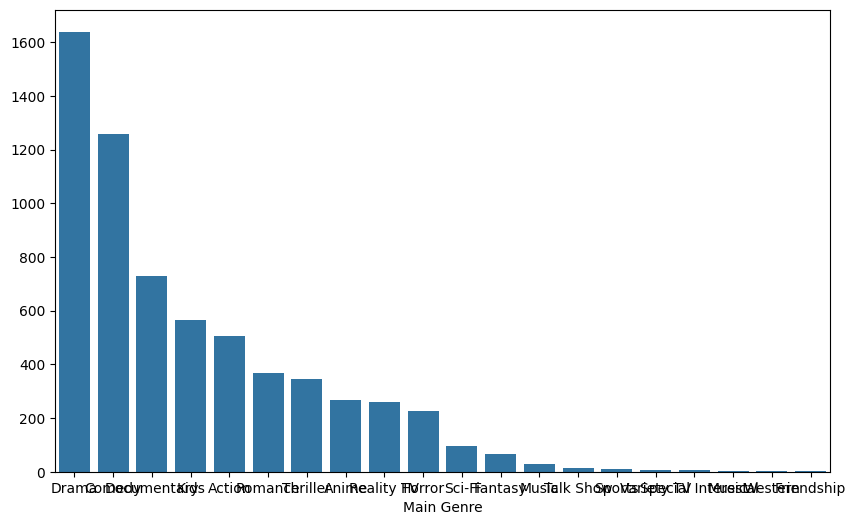

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)